In [156]:
import numpy as np
import matplotlib.pyplot
from graphstats import *
import matplotlib.pyplot as plt

In [145]:
def fuzzy_subsethood(list1, list2, maxes):
    # list1 - A list of features
    # list2 - A list of features
    # maxes - A list of max values of the features in list1 and list2
    
    if np.sum(list1) == 0:
        return 1
    
    d = len(maxes)
    
    A = np.array([list1[i]/maxes[i] for i in range(d)])
    B = np.array([list2[i]/maxes[i] for i in range(d)])
    
    MA = np.sum(A)
    diff = [max(0, A[i] - B[i]) for i in range(d)]
    SUPER = np.sum(diff)/MA
    SUB = 1 - SUPER
    
    return SUB

def fuzzy_similarity(list1, list2, maxes):
    return fuzzy_subsethood(list1, list2, maxes) + fuzzy_subsethood(list1, list2, maxes)

In [38]:
a = [1,2,3,4]
b = [0,0,0,1]
ab = fuzzy_subsethood(a, b, 4*np.ones(4))
ba = fuzzy_subsethood(b, a, 4*np.ones(4))
ab, ba

(0.09999999999999998, 1.0)

In [308]:
#P1 = [
#    [0.2, 0.2, 0.6],
#    [0.5, 0.2, 0.3],
#    [0.1, 0.3, 0.6]
#]

#P2 = [
#    [0.6, 0.2, 0.2],
#    [0.2, 0.3, 0.5],
#    [0.2, 0.6, 0.2]
#]

theta1 = [0.1, 0.85, 0.2, 0.6]
theta2 = [0.9, 0.85, 0.8, 0.1]

def hardy_weinberg(theta):
    return np.array([theta**2, 2*theta*(1 - theta), (1 - theta)**2])

P1 = [hardy_weinberg(t) for t in theta1]
P2 = [hardy_weinberg(t) for t in theta2]

#P1cums = np.cumsum(P1)
#P2cums = np.cumsum(P2)

K = 3
d = 4

acorn = 10

#P1 = [gen_pi(K, acorn = acorn*i) for i in range(d)]
#P2 = [gen_pi(K, acorn = acorn*i*i + 30000) for i in range(d)]

P1cums = [np.cumsum(P1[i]) for i in range(len(P1))]
P2cums = [np.cumsum(P2[i]) for i in range(len(P2))]

In [309]:
#t = np.arange(0, 1, step=0.05)
#for i in t:
#    print(hardy_weinberg(i), '\n')

In [322]:
#np.random.seed(3)

n = 2000
pi = 0.5

n1 = int(n*pi)
n2 = int(n*(1 - pi))

features = []
for i in range(n1):
    temp = np.zeros(d)
    for j in range(d):
        u = np.random.uniform(0, 1)
        if u > P1cums[j][-2]:
        #if u > P1cums[-2]:
            temp[j] = d
        else:
            k = 0
            while k < d and u > P1cums[j][k]:
            #while k < d and u > P1cums[k]:
                k += 1
        temp[j] = k
    features.append(temp)

for i in range(n2):
    temp = np.zeros(d)
    for j in range(d):
        u = np.random.uniform(0, 1)
        if u > P2cums[j][-2]:
        #if u > P1cums[-2]:
            temp[j] = d
        else:
            k = 0
            while k < d and u > P2cums[j][k]:
            #while k < d and u > P2cums[k]:
                k += 1
        temp[j] = k
    features.append(temp)

In [323]:
from tqdm import tqdm


G = np.zeros(shape = (n, n))
maxes = (K - 1)*np.ones(d)# zero indexed
print(maxes)
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        G[i, j] = fuzzy_similarity(features[i], features[j], maxes)
        #G[i, j] = fuzzy_subsethood(features[i], features[j], maxes)
        #G[j, i] = fuzzy_subsethood(features[j], features[i], maxes)
        #G[i, j] = 1 - G[i,j]
        #G[j, i] = G[i, j]
    #G[i,i] = 2

[2. 2. 2. 2.]


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:04<00:00,  4.13it/s]


In [324]:
G

array([[0.        , 0.        , 2.        , ..., 2.        , 1.        ,
        0.        ],
       [0.        , 0.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [0.        , 0.        , 0.        , ..., 1.5       , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.33333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [325]:
V, U = adj_spectral_embedding(G, max_dim = 200)

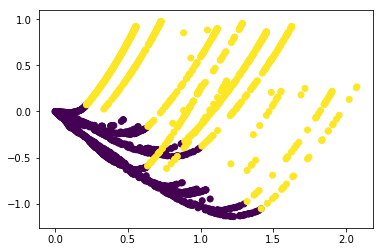

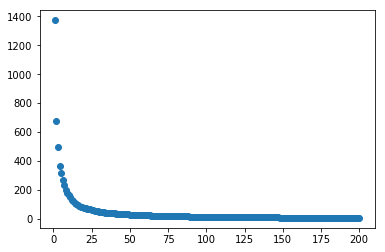

In [326]:
fig, ax = plt.subplots(1,1)
ax.scatter(V[:, 0], V[:, 1], c = np.concatenate((np.zeros(n1), np.ones(n2))))
#ax.scatter(V[:n1, 0], V[:n1, 1])

fig, ax1 = plt.subplots(1,1)
ax1.scatter(np.arange(1, len(U) + 1), U)

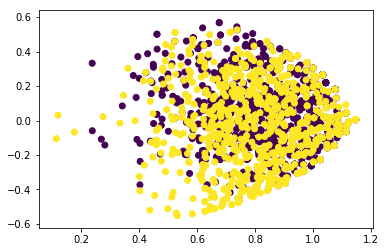

In [199]:
G2 = G/2
V2, U2 = adj_spectral_embedding(G2)
fig, ax = plt.subplots(1,1)
ax.scatter(V[:, 0], V[:, 1], c = np.concatenate((np.zeros(n1), np.ones(n2))))